In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


height:  720.0 width:  1280.0
fps:  25.0 frame_num:  241.0
Title: People
ID: 84973


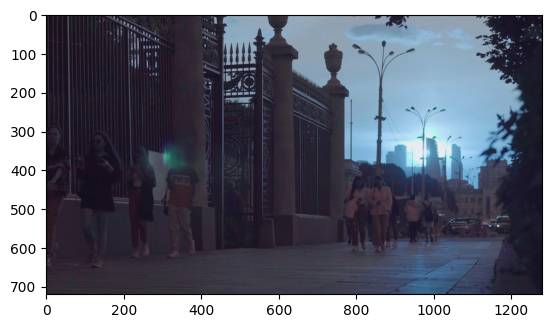

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import librosa

path = "/content/drive/MyDrive/Colab Notebooks/dataset/"
fig = plt.figure()

# 1
people_video = cv2.VideoCapture(path + "videos/People - 84973.mp4")
people_height = people_video.get(cv2.CAP_PROP_FRAME_HEIGHT)
people_width = people_video.get(cv2.CAP_PROP_FRAME_WIDTH)
people_fps = people_video.get(cv2.CAP_PROP_FPS)
people_frame_num = people_video.get(cv2.CAP_PROP_FRAME_COUNT)

print("height: ", people_height, "width: ", people_width)
print("fps: ", people_fps, "frame_num: ", people_frame_num)

# 2
brightest_frame = None
max_brightness = 0
while True:
  ret, frame = people_video.read()
  if not ret:
    break
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  brightness = np.mean(gray_frame)
  if brightness > max_brightness:
    max_brightness = brightness
    brightest_frame = frame
plt.imshow(brightest_frame)
cv2.imwrite(path + "images/output/6322041_People_thumbnail.jpg", brightest_frame)

# 3
def title(string):
  title, id = string.replace(".mp4", '').split(" - ")
  print("Title:", title)
  print("ID:",id)

title("People - 84973.mp4")

# 4
cat_video = cv2.VideoCapture(path + "videos/Cat - 66004.mp4")
resized_frame_size = (int(cat_video.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3), int(cat_video.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3))
binary_cat_video = cv2.VideoWriter(path + "videos/output/6322041_cat_binary.mp4", cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), int(cat_video.get(cv2.CAP_PROP_FPS)), resized_frame_size)
while True:
  ret, frame = cat_video.read()
  if not ret:
    break
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  _, binary_frame = cv2.threshold(gray_frame, 160, 255, cv2.THRESH_BINARY)
  color_binary_frame = cv2.resize(cv2.cvtColor(binary_frame, cv2.COLOR_GRAY2BGR), dsize=resized_frame_size)
  binary_cat_video.write(color_binary_frame)

cat_video.release()
binary_cat_video.release()

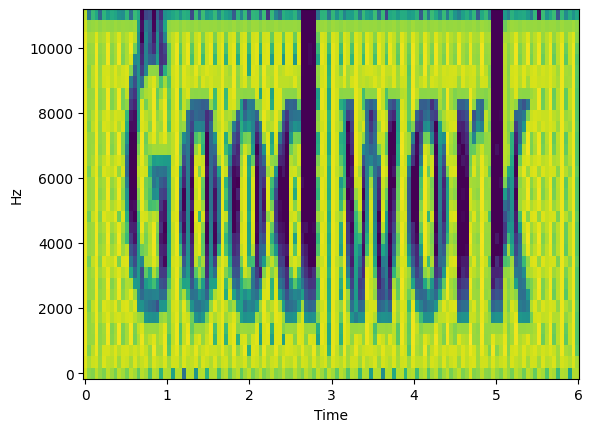

In [6]:
# 5
y, sr = librosa.load(path + "audio/report_audio.wav")
plt.figure()
nfft = 64
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=1024, n_fft = nfft)))
librosa.display.specshow(D, y_axis='linear', sr=sr, hop_length=1024, x_axis='time', cmap='viridis')

detected changed frame:  79.0
detected changed frame:  215.0
detected changed frame:  258.0


Text(0, 0.5, 'correlation')

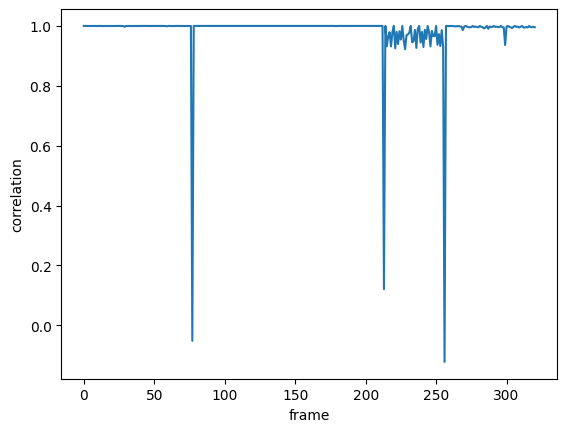

In [ ]:
# 6
import cv2
import matplotlib.pyplot as plt
import numpy as np

detection_video = cv2.VideoCapture(path + "videos/Detection.mp4")
def calculate_correlation(frame1, frame2):
    hist1 = cv2.calcHist([frame1], [0], None, [256], [0, 256])
    hist2 = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist1 = cv2.normalize(hist1, hist1).flatten()
    hist2 = cv2.normalize(hist2, hist2).flatten()
    correlation = cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)
    return correlation

correlations = []
previous_frame = None
threshold_num = 0.5

while True:
  ret, frame = detection_video.read()

  if not ret:
    break

  if previous_frame is not None:
    correlations.append(calculate_correlation(previous_frame, frame))
    if calculate_correlation(previous_frame, frame) < threshold_num:
      print("detected changed frame: ", detection_video.get(cv2.CAP_PROP_POS_FRAMES))

  previous_frame = frame

plt.plot(correlations)
plt.xlabel("frame")
plt.ylabel("correlation")

In [ ]:
# 7
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

class Video:
  def __init__(self, path):
    self.path = path
    self.video = cv2.VideoCapture(path)
    self.set_thumbnail(self.video)
    self.set_title_and_id(os.path.basename(path))
    # print(self.get_title(), self.get_id(), self.get_thumbnail(), self.get_path())

  def set_thumbnail(self, video):
    brightest_frame = None
    max_brightness = 0
    while True:
      ret, frame = video.read()
      if not ret:
        break
      gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      brightness = np.mean(gray_frame)
      if brightness > max_brightness:
        max_brightness = brightness
        brightest_frame = frame
    self.thumbnail = frame

  def set_title_and_id(self, file_name):
    self.title, self.id = file_name.replace(".mp4", '').split(" - ")

  def get_title(self):
    return self.title

  def get_id(self):
    return self.id

  def get_thumbnail(self):
    return self.thumbnail

  def get_path(self):
    return self.path

  def to_binary_frame(self, frame):
    resized_frame_size = (int(self.video.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3), int(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, binary_frame = cv2.threshold(gray_frame, 127, 255, cv2.THRESH_BINARY)
    color_binary_frame = cv2.resize(cv2.cvtColor(binary_frame, cv2.COLOR_GRAY2BGR), dsize=resized_frame_size)
    return color_binary_frame

  def to_gray_frame(self, frame):
    resized_frame_size = (int(self.video.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3), int(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    color_frame = cv2.resize(cv2.cvtColor(gray_frame, cv2.COLOR_GRAY2BGR), dsize=resized_frame_size)
    return color_frame

  def process_video(self, func):
    resized_frame_size = (int(self.video.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.3), int(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.3))
    output_video = cv2.VideoWriter(os.path.dirname(self.path) + "/output/out - " + self.title + " - " + self.id + ".mp4", cv2.VideoWriter_fourcc('M', 'P', '4', 'V'),
                                       int(self.video.get(cv2.CAP_PROP_FPS)), resized_frame_size)
    self.video.set(cv2.CAP_PROP_POS_FRAMES, 0)
    while True:
      ret, frame = self.video.read()
      if not ret:
        break
      output_frame = func(frame)
      output_video.write(output_frame)


# test
video1 = Video(path+"videos/Cat - 66004.mp4")
video1.process_video(video1.to_gray_frame)
video1.process_video(video1.to_binary_frame)